# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
humid_df = pd.read_csv("../output_data/cities.csv")
humid_df.dropna()
humid_df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

In [7]:
(humid_df.iloc[:,6])
(humid_df.iloc[:,6])
(humid_df.iloc[:,6])
(humid_df.iloc[:,6])


0      68.05
1     -20.41
2      77.48
3      40.71
4     -33.93
       ...  
543    33.97
544    24.01
545    49.65
546    51.07
547    27.72
Name: Lat, Length: 548, dtype: float64

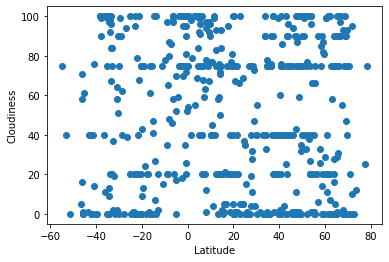

In [8]:
plt.scatter(humid_df.iloc[:,6],humid_df.iloc[:,2])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

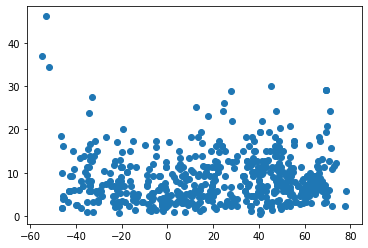

In [9]:
plt.scatter(humid_df.iloc[:,6], humid_df.iloc[:,9])

## Linear Regression

In [37]:
north_df = (humid_df.iloc[:,7] > 0)

north_df.head()



0     True
1     True
2    False
3     True
4     True
Name: Lng, dtype: bool

In [33]:
south_df = humid_df(humid_df['Lat'] < 0)

south_df.head()

TypeError: 'DataFrame' object is not callable

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

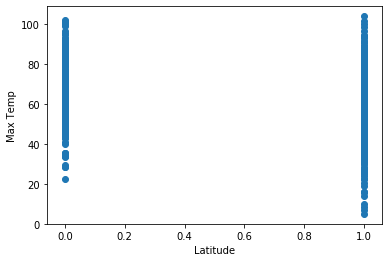

In [40]:
x_values = north_df
y_values = humid_df['Max Temp']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(
'Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


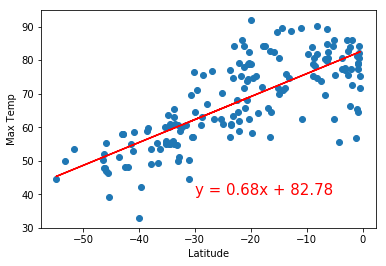

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


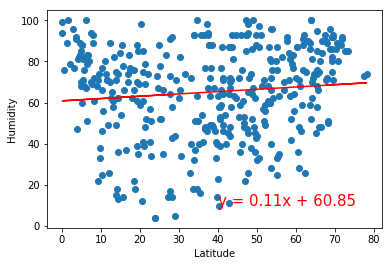

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


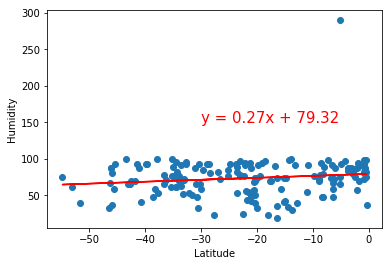

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


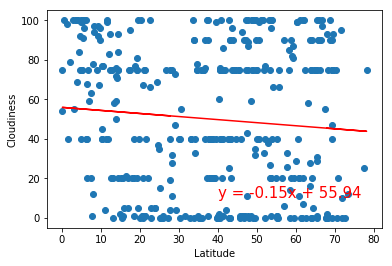

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


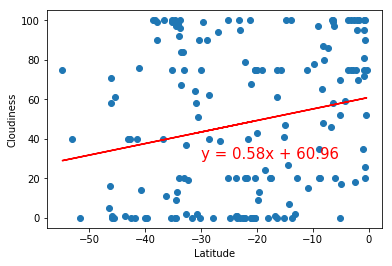

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


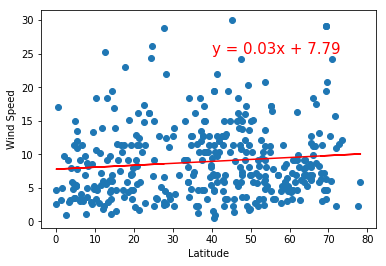

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


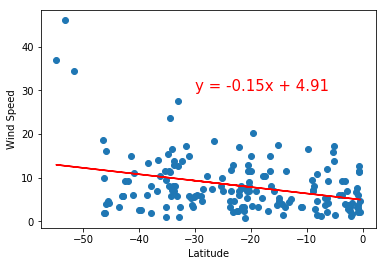

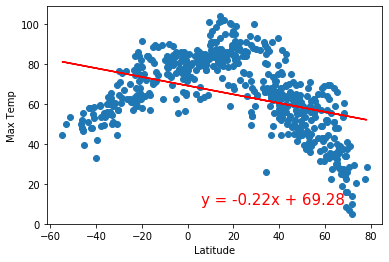

In [11]:
x_values = humid_df['Lat']
y_values = humid_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()